# seaborn (FactorGrid)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

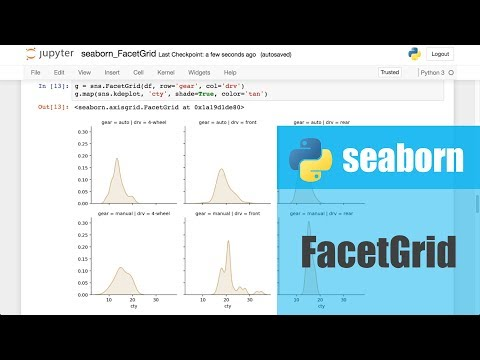

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('NHV7ZvW2vaY', width=720, height=405)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 0.25.3
seaborn version = 0.9.0


## read miles per gallon dataset (mpg.csv)

In [4]:
url='https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df=pd.read_csv(url)
df.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
182,toyota,camry,2.4,2008,4,auto(l5),f,21,31,r,midsize
181,toyota,camry,2.4,2008,4,manual(m5),f,21,31,r,midsize
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
93,ford,mustang,4.0,2008,6,auto(l5),r,16,24,r,subcompact
123,jeep,grand cherokee 4wd,3.7,2008,6,auto(l5),4,15,19,r,suv
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
168,subaru,impreza awd,2.5,1999,4,auto(l4),4,19,26,r,subcompact
132,land rover,range rover,4.4,2008,8,auto(s6),4,12,18,r,suv
82,ford,explorer 4wd,5.0,1999,8,auto(l4),4,13,17,r,suv


In [5]:
df['gear']=df.trans.str[0].map({'a':'auto', 'm':'manual'}).astype("category")
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


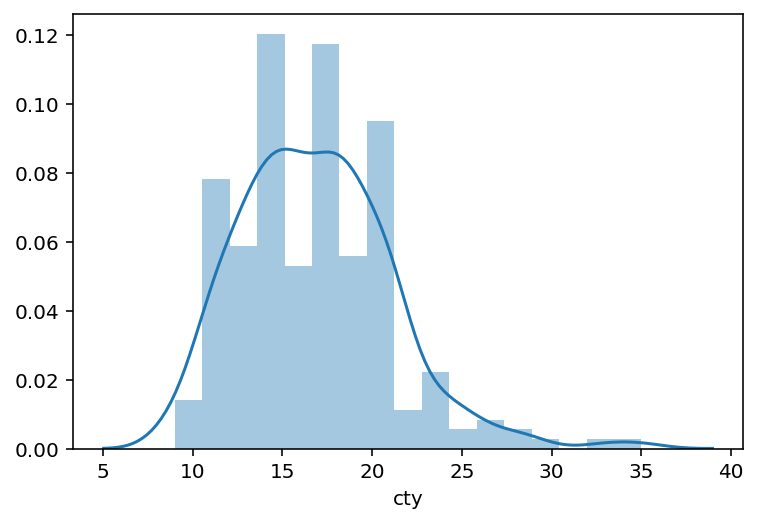

In [6]:
sns.distplot(df['cty'])

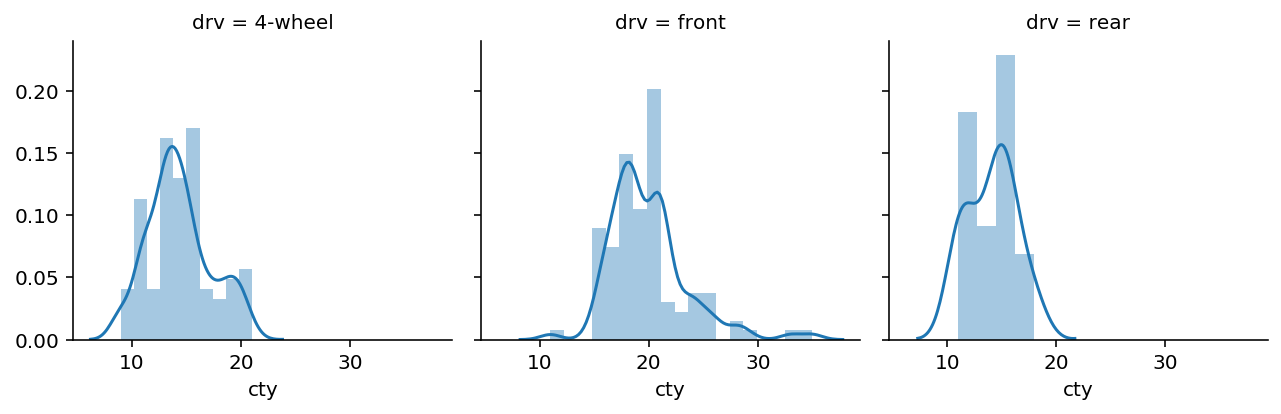

In [7]:
g = sns.FacetGrid(df, col='drv')
# g
g.map(sns.distplot, 'cty')

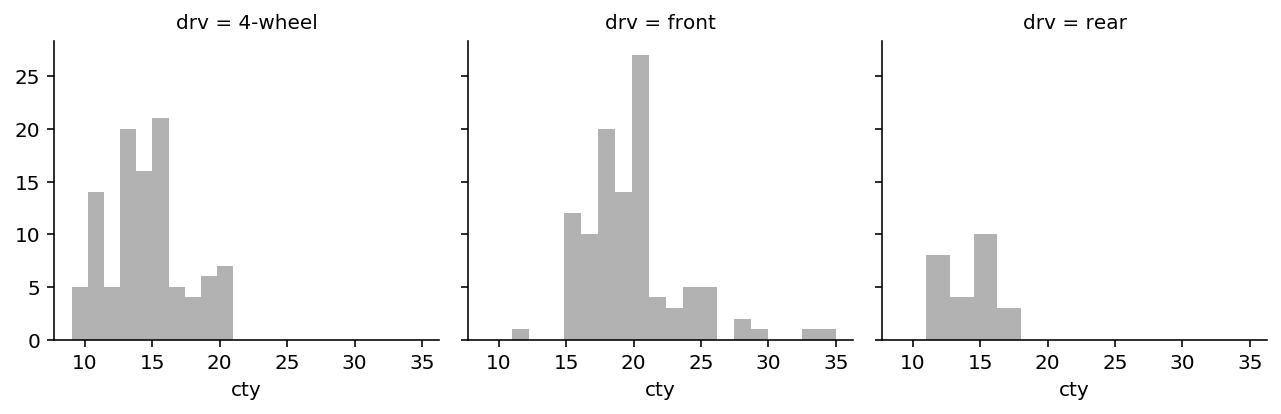

In [8]:
g = sns.FacetGrid(df, col='drv')
g.map(sns.distplot, 'cty', kde=False, color='.25')

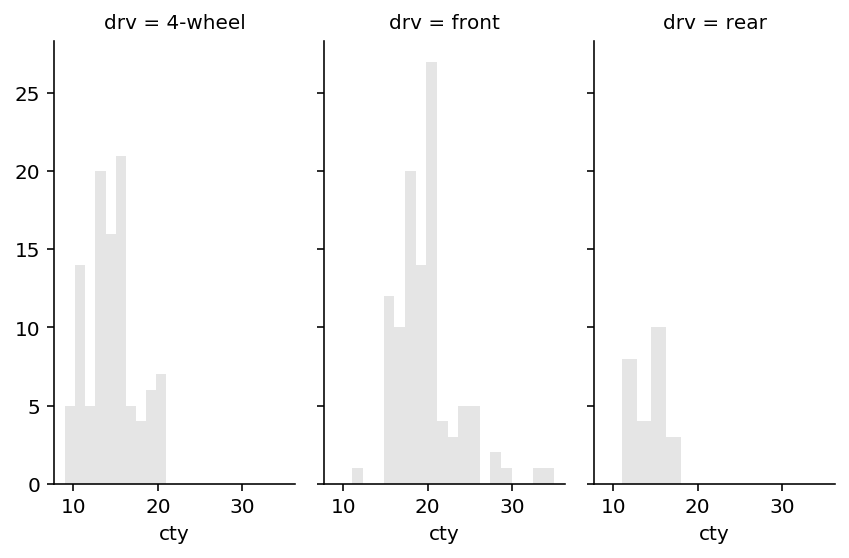

In [9]:
# set size and aspect
g = sns.FacetGrid(df, col='drv', height=4, aspect=.5)
g.map(sns.distplot, 'cty', kde=False, color='.75')

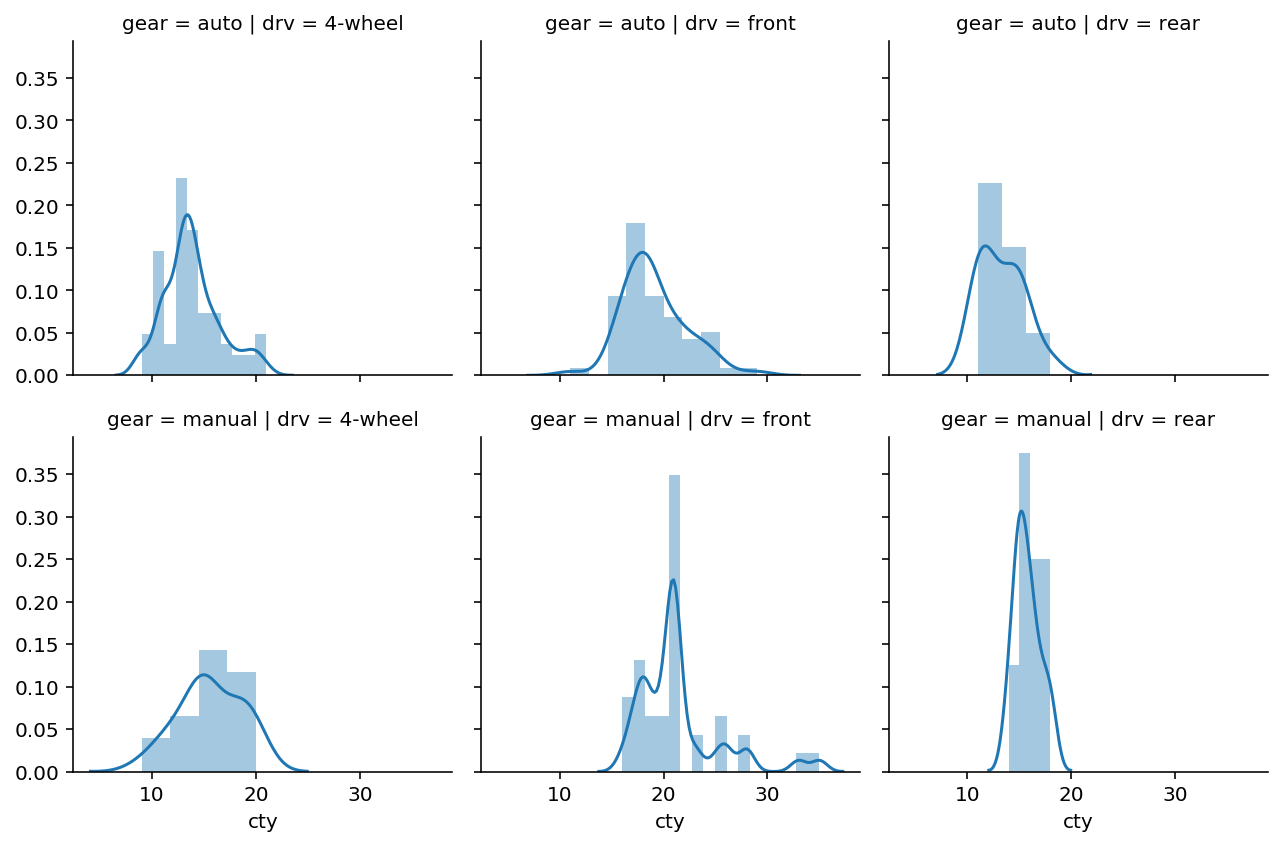

In [10]:
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(sns.distplot, 'cty')

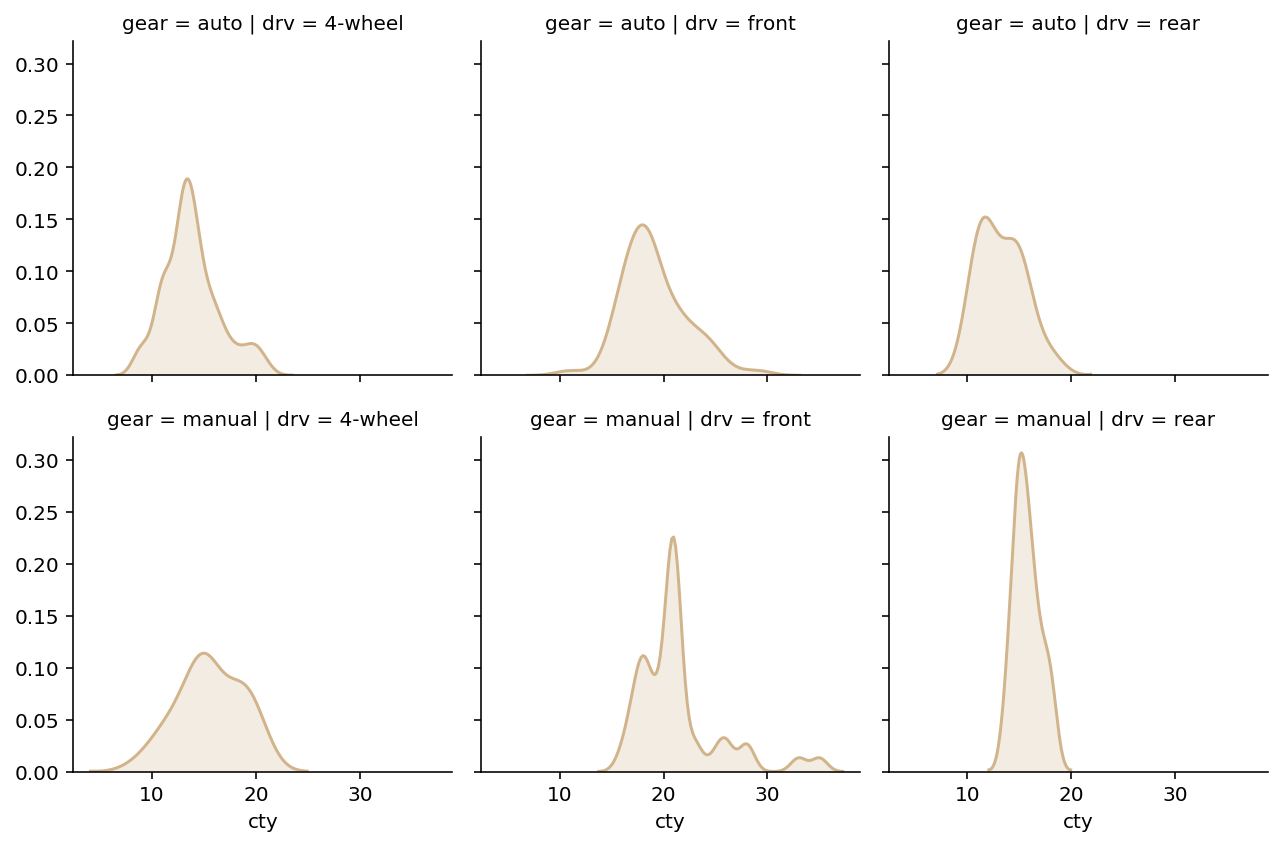

In [11]:
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(sns.kdeplot, 'cty', shade=True, color='tan')

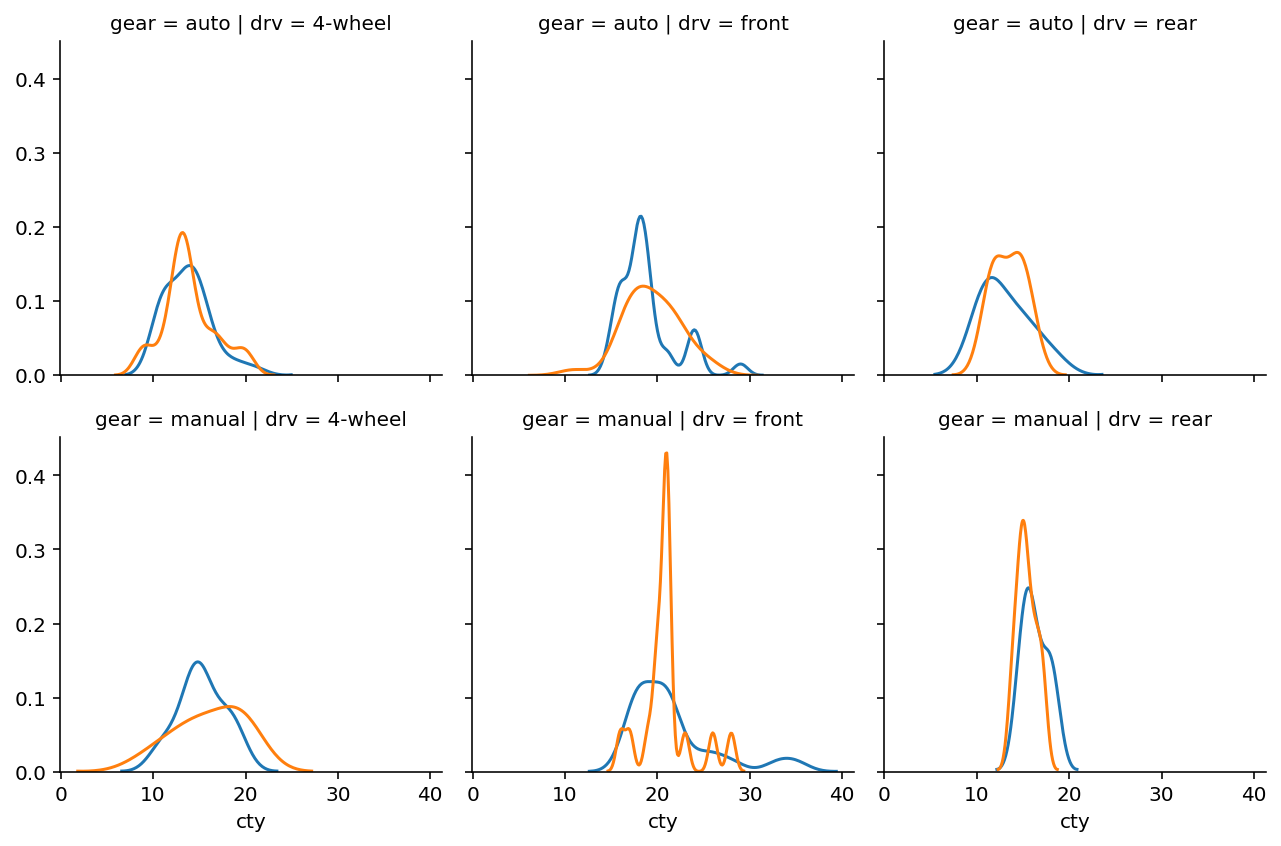

In [12]:
g = sns.FacetGrid(df, row='gear', col='drv', hue='year')
g.map(sns.kdeplot, 'cty')

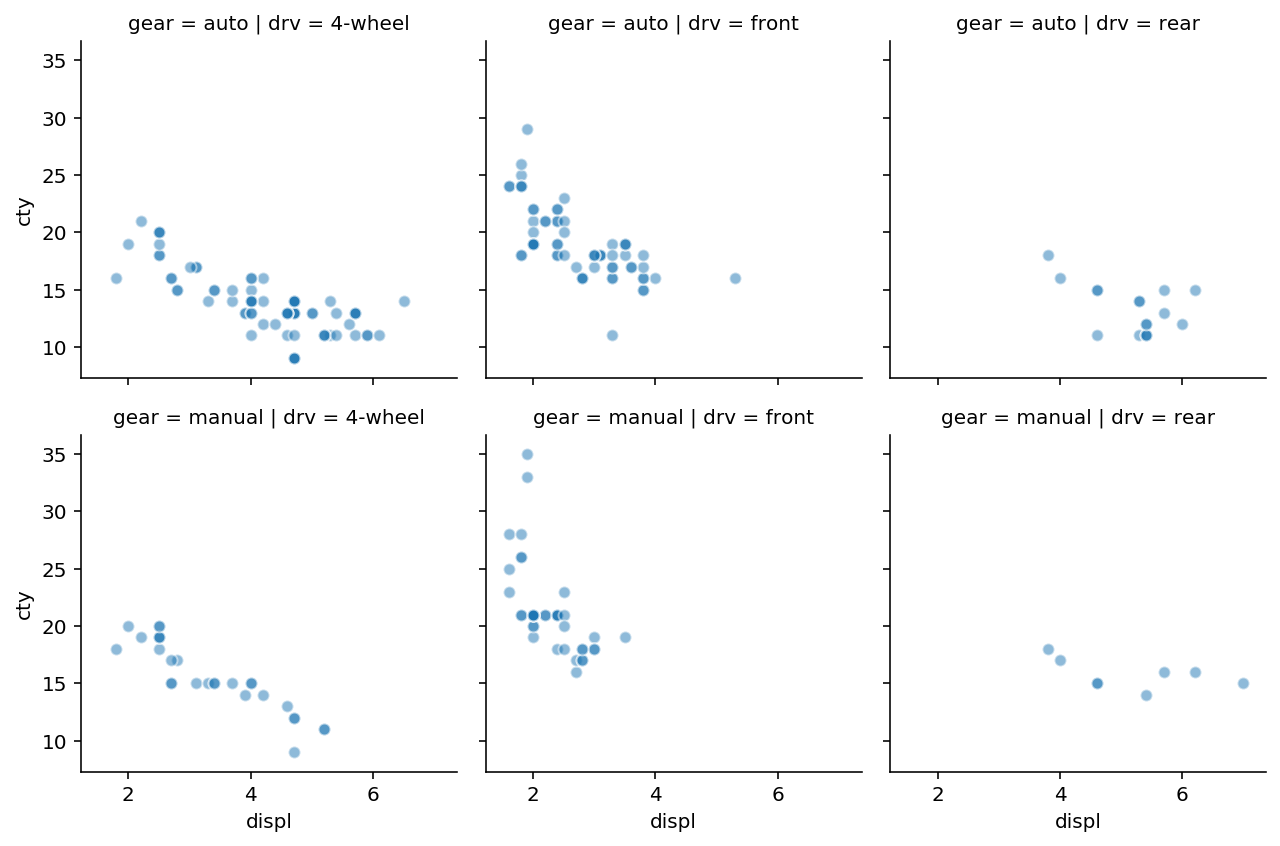

In [13]:
# use native matplotlib plt.scatter
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(plt.scatter, "displ", "cty", alpha=.5, edgecolor='white')

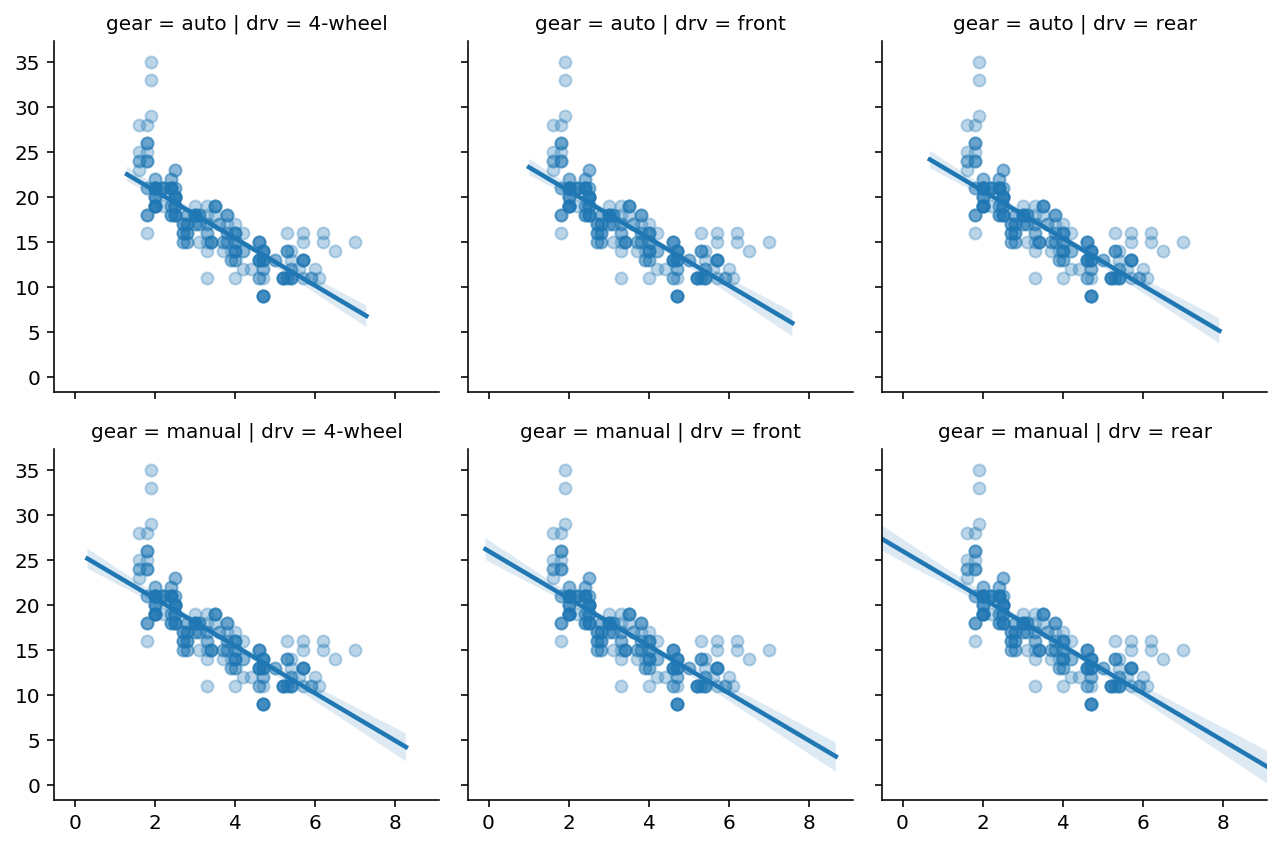

In [14]:
g = sns.FacetGrid(df, row='gear', col='drv')
g.map(sns.regplot, x='displ', y='cty', data=df, fit_reg=True, scatter_kws={'alpha':.3})

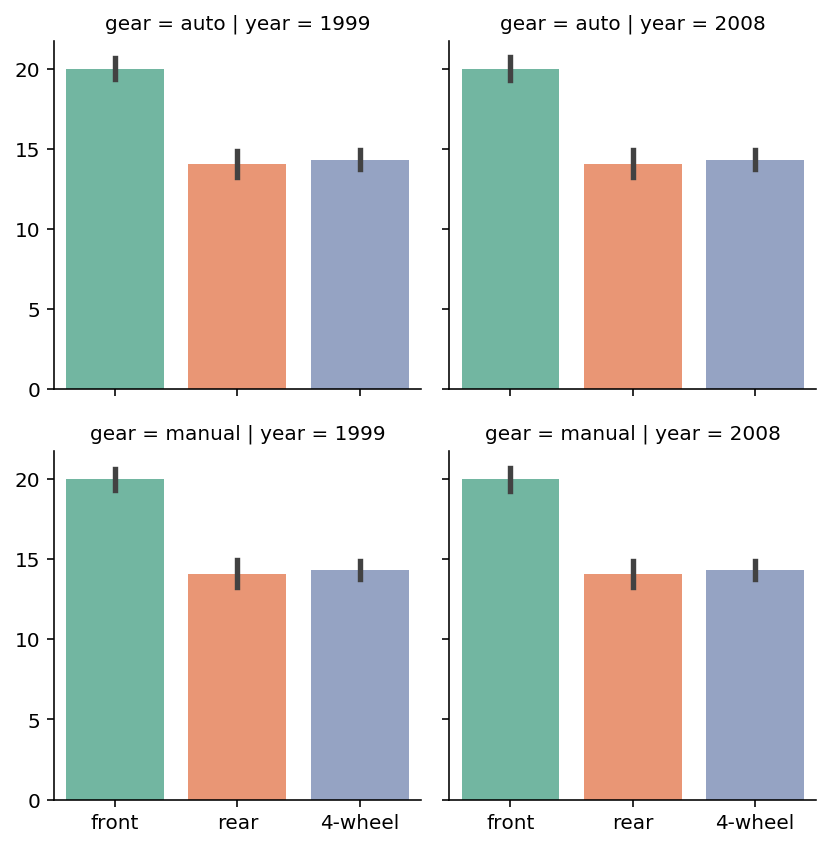

In [15]:
g = sns.FacetGrid(df, row='gear', col='year')
g.map(sns.barplot, x='drv', y='cty', data=df, palette='Set2', order=['front', 'rear', '4-wheel'])

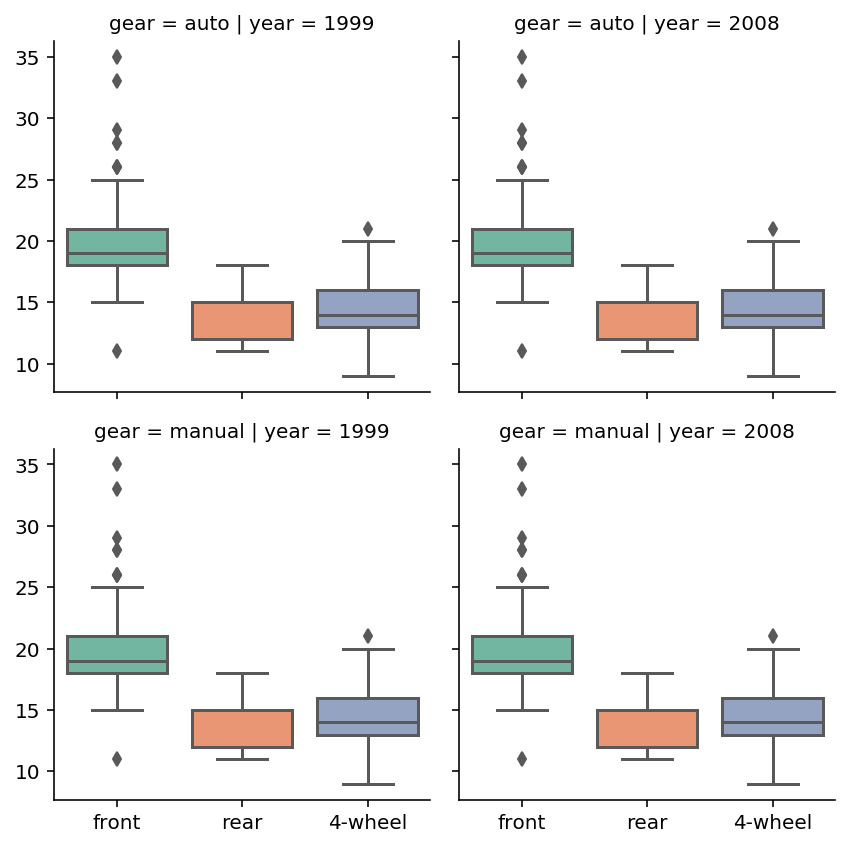

In [16]:
g = sns.FacetGrid(df, row='gear', col='year')
g.map(sns.boxplot, x='drv', y='cty', data=df, palette='Set2', order=['front', 'rear', '4-wheel'])